In [1]:
# installing tensorflow_text 
!pip install tensorflow_text  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [2]:
# importing required libraries
import numpy as np

import typing
from typing import Any, Tuple

import tensorflow as tf

import tensorflow_text as tf_text

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# using builtin implementations
use_builtins = True

In [4]:
#@title Shape checker
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    if isinstance(names, str):
      names = (names,)

    shape = tf.shape(tensor)
    rank = tf.rank(tensor)

    if rank != len(names):
      raise ValueError(f'Rank mismatch:\n'
                       f'    found {rank}: {shape.numpy()}\n'
                       f'    expected {len(names)}: {names}\n')

    for i, name in enumerate(names):
      if isinstance(name, int):
        old_dim = name
      else:
        old_dim = self.shapes.get(name, None)
      new_dim = shape[i]

      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

In [5]:
!pip install Metaphone
from metaphone import doublemetaphone
import pandas as pd
import re
data=pd.read_csv("/kaggle/input/file-name/file_name.csv")

data['tr']=data['tr'].apply(lambda x: str(x).lower())
data['Sentence']=data['Sentence'].apply(lambda x: str(x).lower())

  Preparing metadata (setup.py) ... done
  Created wheel for Metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=4fdda7e44b95c0aa14a39d96bcb00bd3aa3d12764e476ee6ac559bac649ee830
  Stored in directory: /root/.cache/pip/wheels/3a/2c/57/cb7d38aa6c80a870a0341ccf4265c2921fb55b1f7f4b76b46b
Successfully built Metaphone


In [108]:
hin_vocab=dict()
for i in data['Sentence'].apply(lambda x: re.sub("[.!?\\-\'\"]", "", x)):
    for j in i.split(' '):
        hin_vocab[doublemetaphone(j)[0]+'*'+doublemetaphone(j[::-1])[0]+'*'+j[:2]+'*'+j[len(j)-1:]]=j
for i in hin_vocab:
    a=set()
    a.add(hin_vocab[i])
    hin_vocab[i]=a
for i in data['Sentence'].apply(lambda x: re.sub("[.!?\\-\'\"]", "", x)):
    for j in i.split(' '):
        hin_vocab[doublemetaphone(j)[0]+'*'+doublemetaphone(j[::-1])[0]+'*'+j[:2]+'*'+j[len(j)-1:]].add(j)
print(len(hin_vocab))
hin_vocab

14239


{'ASK*AKS*us*e': {'uske'},
 'L*AL*li*e': {'liye'},
 'T*HT*to*h': {'toh'},
 'PHT*THP*ba*t': {'bahaut'},
 'KX*KK*ku*h': {'kuch'},
 'KRN*ANRK*ka*a': {'karna'},
 'PTK*AJTP*pa*a': {'padega'},
 'A*A*ye*e': {'yee'},
 'PPN*NPP*pa*n': {'paapon'},
 'S*AS*se*e': {'se'},
 'KM*MK*ka*m': {'kamm'},
 'NH*AHN*na*i': {'nahi'},
 'XLK*AJLK*ch*a': {'chilayega'},
 'AH*AH*ye*i': {'yehi'},
 'T*AT*to*o': {'tooo'},
 'HM*M*hu*m': {'hum'},
 'SMJN*ANMS*se*e': {'semjhane'},
 'K*AK*ki*i': {'kii'},
 'KXX*SSK*ko*h': {'koshishh'},
 'KR*RK*ka*r': {'kaur'},
 'RH*AHR*ra*e': {'rahe'},
 'HN*N*ha*n': {'hawon'},
 'LK*KL*lo*g': {'loog'},
 'SP*PS*sa*b': {'sab'},
 'K*AK*ko*o': {'koo'},
 'AS*AS*is*i': {'isi'},
 'MN*NM*me*n': {'mein'},
 'TL*LT*to*l': {'tol'},
 'TT*ATT*de*e': {'dete'},
 'KNTKSTT*TKSTNK*co*:': {'context:'},
 'KK*AKK*ca*e': {'cake'},
 'KH*AHK*ka*a': {'kahaa'},
 'H*A*ha*i': {'hawaii'},
 'AM*M*im*m': {'im'},
 'AN*N*in*n': {'in'},
 'AT*T*at*t': {'at'},
 '0*AT*th*e': {'thee'},
 'MMNT*TNMM*mo*t': {'moment'},
 '***': {''},

In [7]:
data['Sentence']=data['Sentence'].apply(lambda x: re.sub("[.!?\\-\'\"]", "", x))
data['Sentence']

0        congratulations on you celebrating british kid...
1        uske liye toh bahot kuch karna padega ye pappi...
2        yehi to hum semjhane ki koshish kar rahe hain ...
3                                           cake kaha hai 
4        im in hawaii at the moment  home next friday n...
                               ...                        
13733    dr kumar vishwas: koi deewana kehta hai koi pa...
13734    me: aaj kuch toofani karte haimom: pani ki bot...
13735    pyar mangi to jaan dengi,milk mango to kher de...
13736                      kaale kaale baal gaal gore gore
13737                              ye sab auntyon ke saath
Name: Sentence, Length: 13738, dtype: object

In [8]:
def change_vocab(line):
    string=''
    for j in line.split(' '):
        string=string+list(hin_vocab[doublemetaphone(j)[0]+'*'+doublemetaphone(j[::-1])[0]+'*'+j[:2]+'*'+j[len(j)-1:]])[0]+' '
    return string

In [9]:
data['Sentence']=data['Sentence'].apply(lambda x: change_vocab(x).strip())

In [10]:
data

,Sentence,English_Translation,tr
0,congratulations on you celebrating british kid...,@some users congratulate you for celebrating B...,congratulations on you celebrating british kid...
1,uske liye toh bahaut kuch karna padega yee paa...,"@Lokardi_ rat we should a lot more for that, b...","you will have to do a lot for that, it will no..."
2,yehi tooo hum semjhane kii koshishh kaur rahe ...,"@Slimswami ehi, this is what i'm expecting you...",this is what we are trying to understand. peop...
3,cake kahaa hawaii,@Where is Dramebajakudi where is the cake?,where is the cake??
4,im in hawaii at thee moment home next friday ...,@some user Don't want to come home next friday...,i'm in hawaii at the moment . home next friday...
...,...,...,...
13733,dr kumar vishwas: koii deewaniya kehta hawaii ...,"Dr Kumar Vishwas: ""Some used to say lover.. So...","dr. kumar vishwas: ""some say crazy..some think..."
13734,me: aawaj kuch toofani karte haimom: pani kii ...,Me: Let's do some stormy today.\n\nMom: Fill t...,me: let's do something stormy today. mother: f...
13735,"pyar maangi tooo jawaan dengi,milk maango tooo...","Ask for love we'll give life, ask for milk we'...","if you ask for love, you will give your life, ..."
13736,kalwe kalwe baal gal gore gore,@imcomplicated__black black hair cheeks fair fair,kale kale bal gal gore gore


In [11]:
data['len_sen']=data['Sentence'].apply(lambda x: len(x.split(' ')))
data=data[data['len_sen']<=20]

In [12]:
inp=list(data['Sentence'])
targ=list(data['tr'])

In [13]:
# printing last english sentence
print(targ[-1])

all this with the aunties?


In [14]:
# printing first 100 english sentence
print(targ[:100])

['you will have to do a lot for that, it will not work with puppies.', 'this is what we are trying to understand. people give toll to everything in this. context:', 'where is the cake??', "i'm in hawaii at the moment . home next friday night . don't want to come home .", "victory celebration and early morning eating bread pakora at tandon's cottage vaishali damoh", 'dry puri and give', 'means you are not karishma but raveena? and the charisma that was there, where is ravan now?', 'truth has won *tears in eyes*', 'really dude', 'who is this humble person?', 'yes, its window was open from which baburao was peeping.', 'friend, do you confess or torture. , , such a big confession', 'you will have to sign up and add the juice to my account, only then the recharge will be done.', 'miss msd "it has become a habit seeing you captain..', 'note this application will be downloaded from google playstore, toh fake toh ho hi nahi sakti " . . .', 'just never boasted.', 'from where did you learn this 

In [15]:
# printing first 100 hinglish sentences
print(inp[-1:])

['yee sab auntyon keee sath']


In [16]:
# arrays of strings are shuffled and batches are made
BUFFER_SIZE = len(inp)
BATCH_SIZE = 64

dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [17]:
for example_input_batch, example_target_batch in dataset.take(1):
  print(example_input_batch[:5])
  print()
  print(example_target_batch[:5])
  break

tf.Tensor(
[b'itani khushi itani khushi  i have nooo idea whaaat tooo doo  thats how champions play'
 b'yee jalti hawaii hamre pyar se'
 b'murgi aur taang kii badhwaye kaur raahi hoo lagta hawaii mohatarma aapko bhook lagi hawaii khanye mee raaiyta zarur lena'
 b'similarity betiyon shri moti and captain dhoni is'
 b'mazak, paisa aur whai jaaj'], shape=(5,), dtype=string)

tf.Tensor(
[b"itni khushi itni khushi . i have no idea what to do ! that's how champions play ."
 b'it burns with our love.'
 b', you are talking about chicken and legs.. it seems that you are hungry, madam.. must have raita in the meal.'
 b'similarity between shri modi and captain dhoni is'
 b'fun, money and wha jazz'], shape=(5,), dtype=string)


In [18]:
# unicode normalization operation - first step to standardize data
example_text = tf.constant('Yahi haal hai')

print(example_text.numpy())
print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

b'Yahi haal hai'
b'Yahi haal hai'


In [19]:
def tf_lower_and_split_punct(text):
  # Split accecented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [20]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

Yahi haal hai
[START] yahi haal hai [END]


In [21]:
max_vocab_size = 5000

input_text_processor = tf.keras.layers.TextVectorization(    # handles vocabulary extraction & conversion of i/p text to sequences of tokens
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

In [22]:
input_text_processor.adapt(inp)    # initializes the layer based on the data

# Here are the first 10 words from the vocabulary:
input_text_processor.get_vocabulary()[:10]
# Hinglish TextVectorization layer

['',
 '[UNK]',
 '[START]',
 '[END]',
 'hawaii',
 'bhaaaaiiiiii',
 ',',
 'nahi',
 'tooo',
 'keee']

In [23]:
output_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

output_text_processor.adapt(targ)
output_text_processor.get_vocabulary()[:10]
# English TextVectorization layer

['', '[UNK]', '.', '[START]', '[END]', ',', 'the', 'is', 'you', '?']

In [24]:
# the above layers convert a batch of strings into a batch of token IDs
example_tokens = input_text_processor(example_input_batch)
example_tokens[:3, :10]

<tf.Tensor: shape=(3, 10), dtype=int64, numpy=
array([[   2,  263,  359,  263,  359,   58,  336,  253, 1364,  442],
       [   2,   16,  335,    4,  326,   81,   11,    3,    0,    0],
       [   2, 2981,   19, 1854,   10,  244,   18,   99,   12,  149]])>

In [25]:
# get_vocabulary - converts token IDs back to text
input_vocab = np.array(input_text_processor.get_vocabulary())
tokens = input_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] itani khushi itani khushi i have nooo idea whaaat tooo doo thats how champions play [END]     '

Text(0.5, 1.0, 'Mask')

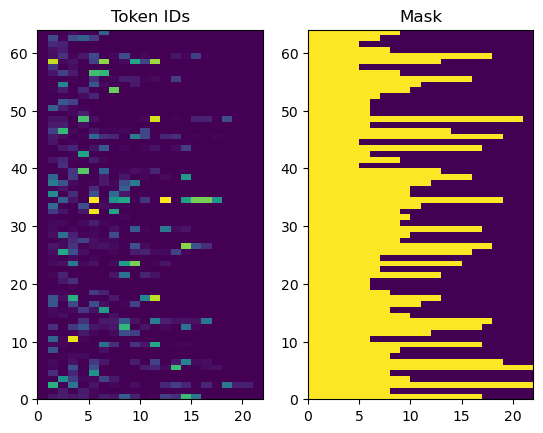

In [26]:
# token IDs converted into a mask
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [27]:
# defining constants for the model
embedding_dim = 256
units = 1024

Encoding

In [28]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, input_vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()
    self.enc_units = enc_units
    self.input_vocab_size = input_vocab_size

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.input_vocab_size,
                                               embedding_dim)

    # The GRU RNN layer processes those vectors sequentially.
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   # Return the sequence and state
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform',
                                  recurrent_dropout=0.1)

  def call(self, tokens, state=None):
    shape_checker = ShapeChecker()
    shape_checker(tokens, ('batch', 's'))

    # 2. The embedding layer looks up the embedding for each token.
    vectors = self.embedding(tokens)
    shape_checker(vectors, ('batch', 's', 'embed_dim'))

    # 3. The GRU processes the embedding sequence.
    #    output shape: (batch, s, enc_units)
    #    state shape: (batch, enc_units)
    output, state = self.gru(vectors, initial_state=state)
    shape_checker(output, ('batch', 's', 'enc_units'))
    shape_checker(state, ('batch', 'enc_units'))

    # 4. Returns the new sequence and its state.
    return output, state

In [29]:
# Convert the input text to tokens.
example_tokens = input_text_processor(example_input_batch)

# Encode the input sequence.
encoder = Encoder(input_text_processor.vocabulary_size(),
                  embedding_dim, units)
example_enc_output, example_enc_state = encoder(example_tokens)

print(f'Input batch, shape (batch): {example_input_batch.shape}')
print(f'Input batch tokens, shape (batch, s): {example_tokens.shape}')
print(f'Encoder output, shape (batch, s, units): {example_enc_output.shape}')
print(f'Encoder state, shape (batch, units): {example_enc_state.shape}')

Input batch, shape (batch): (64,)
Input batch tokens, shape (batch, s): (64, 22)
Encoder output, shape (batch, s, units): (64, 22, 1024)
Encoder state, shape (batch, units): (64, 1024)


Attention layer

In [30]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super().__init__()
    # For Eqn. (4), the  Bahdanau attention
    self.W1 = tf.keras.layers.Dense(units, use_bias=False)
    self.W2 = tf.keras.layers.Dense(units, use_bias=False)

    self.attention = tf.keras.layers.AdditiveAttention()

  def call(self, query, value, mask):
    shape_checker = ShapeChecker()
    shape_checker(query, ('batch', 't', 'query_units'))
    shape_checker(value, ('batch', 's', 'value_units'))
    shape_checker(mask, ('batch', 's'))

    # From Eqn. (4), `W1@ht`.
    w1_query = self.W1(query)
    shape_checker(w1_query, ('batch', 't', 'attn_units'))

    # From Eqn. (4), `W2@hs`.
    w2_key = self.W2(value)
    shape_checker(w2_key, ('batch', 's', 'attn_units'))

    query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
    value_mask = mask

    context_vector, attention_weights = self.attention(
        inputs = [w1_query, value, w2_key],
        mask=[query_mask, value_mask],
        return_attention_scores = True,
    )
    shape_checker(context_vector, ('batch', 't', 'value_units'))
    shape_checker(attention_weights, ('batch', 't', 's'))

    return context_vector, attention_weights

In [31]:
# creating BahdanauAttention layer
attention_layer = BahdanauAttention(units)

In [32]:
(example_tokens != 0).shape

TensorShape([64, 22])

In [33]:
# Later, the decoder will generate this attention query
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

# Attend to the encoded tokens

context_vector, attention_weights = attention_layer(
    query=example_attention_query,
    value=example_enc_output,
    mask=(example_tokens != 0))

print(f'Attention result shape: (batch_size, query_seq_length, units):           {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units):           (64, 2, 1024)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (64, 2, 22)


Text(0.5, 1.0, 'Mask')

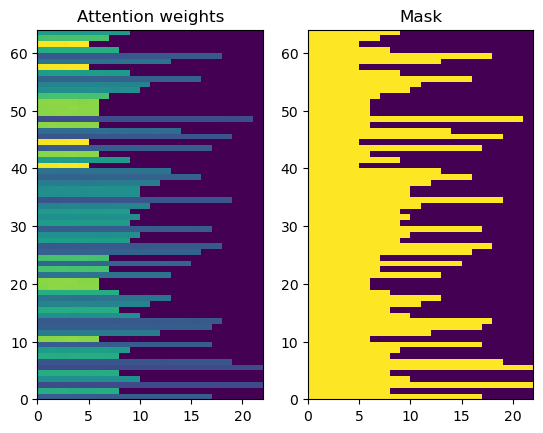

In [34]:
plt.subplot(1, 2, 1)
plt.pcolormesh(attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')


In [35]:
attention_weights.shape

TensorShape([64, 2, 22])

In [36]:
attention_slice = attention_weights[0, 0].numpy()
attention_slice = attention_slice[attention_slice != 0]

<Figure size 640x480 with 0 Axes>

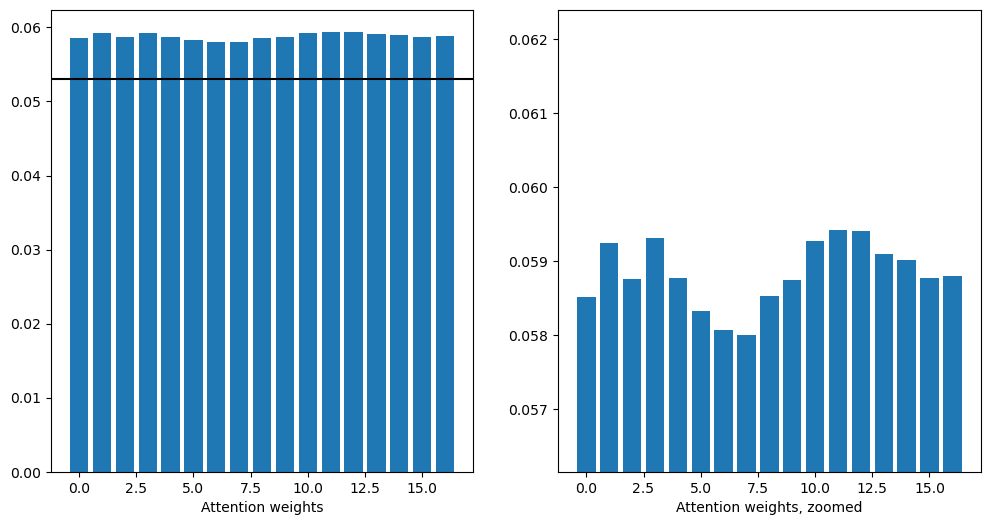

In [37]:
#@title
plt.suptitle('Attention weights for one sequence')

plt.figure(figsize=(12, 6))
a1 = plt.subplot(1, 2, 1)
plt.bar(range(len(attention_slice)), attention_slice)
# freeze the xlim
plt.xlim(plt.xlim())
plt.xlabel('Attention weights')

a2 = plt.subplot(1, 2, 2)
plt.bar(range(len(attention_slice)), attention_slice)
plt.xlabel('Attention weights, zoomed')

# zoom in
top = max(a1.get_ylim())
zoom = 0.85*top
a2.set_ylim([0.90*top, top])
a1.plot(a1.get_xlim(), [zoom, zoom], color='k')

Decoder

In [38]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, output_vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    self.dec_units = dec_units
    self.output_vocab_size = output_vocab_size
    self.embedding_dim = embedding_dim

    # For Step 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.output_vocab_size,
                                               embedding_dim)

    # For Step 2. The RNN keeps track of what's been generated so far.
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform',
                                  recurrent_dropout=0.1)

    # For step 3. The RNN output will be the query for the attention layer.
    self.attention = BahdanauAttention(self.dec_units)

    # For step 4. Eqn. (3): converting `ct` to `at`
    self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh,
                                    use_bias=False)

    # For step 5. This fully connected layer produces the logits for each output token.
    self.fc = tf.keras.layers.Dense(self.output_vocab_size)

In [39]:
class DecoderInput(typing.NamedTuple):
  new_tokens: Any
  enc_output: Any
  mask: Any

class DecoderOutput(typing.NamedTuple):
  logits: Any
  attention_weights: Any

In [40]:
def call(self,
         inputs: DecoderInput,
         state=None) -> Tuple[DecoderOutput, tf.Tensor]:
  shape_checker = ShapeChecker()
  shape_checker(inputs.new_tokens, ('batch', 't'))
  shape_checker(inputs.enc_output, ('batch', 's', 'enc_units'))
  shape_checker(inputs.mask, ('batch', 's'))

  if state is not None:
    shape_checker(state, ('batch', 'dec_units'))

  # Step 1. Lookup the embeddings
  vectors = self.embedding(inputs.new_tokens)
  shape_checker(vectors, ('batch', 't', 'embedding_dim'))

  # Step 2. Process one step with the RNN
  rnn_output, state = self.gru(vectors, initial_state=state)

  shape_checker(rnn_output, ('batch', 't', 'dec_units'))
  shape_checker(state, ('batch', 'dec_units'))

  # Step 3. Use the RNN output as the query for the attention over the
  # encoder output.
  context_vector, attention_weights = self.attention(
      query=rnn_output, value=inputs.enc_output, mask=inputs.mask)
  shape_checker(context_vector, ('batch', 't', 'dec_units'))
  shape_checker(attention_weights, ('batch', 't', 's'))

  # Step 4. Eqn. (3): Join the context_vector and rnn_output
  #     [ct; ht] shape: (batch t, value_units + query_units)
  context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)

  # Step 4. Eqn. (3): `at = tanh(Wc@[ct; ht])`
  attention_vector = self.Wc(context_and_rnn_output)
  shape_checker(attention_vector, ('batch', 't', 'dec_units'))

  # Step 5. Generate logit predictions:
  logits = self.fc(attention_vector)
  shape_checker(logits, ('batch', 't', 'output_vocab_size'))

  return DecoderOutput(logits, attention_weights), state

In [41]:
Decoder.call = call

In [42]:
decoder = Decoder(output_text_processor.vocabulary_size(),
                  embedding_dim, units)

In [43]:
# Convert the target sequence, and collect the "[START]" tokens
example_output_tokens = output_text_processor(example_target_batch)

start_index = output_text_processor.get_vocabulary().index('[START]')
first_token = tf.constant([[start_index]] * example_output_tokens.shape[0])

In [44]:
# Run the decoder
dec_result, dec_state = decoder(
    inputs = DecoderInput(new_tokens=first_token,
                          enc_output=example_enc_output,
                          mask=(example_tokens != 0)),
    state = example_enc_state
)

print(f'logits shape: (batch_size, t, output_vocab_size) {dec_result.logits.shape}')
print(f'state shape: (batch_size, dec_units) {dec_state.shape}')

logits shape: (batch_size, t, output_vocab_size) (64, 1, 5000)
state shape: (batch_size, dec_units) (64, 1024)


In [45]:
# sample token according to logits
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)

In [46]:
# decode the token as first word of o/p
vocab = np.array(output_text_processor.get_vocabulary())
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['scared'],
       ['falls'],
       ['secretly'],
       ['kunal'],
       ['radicalism']], dtype='<U24')

In [47]:
# decoder generates second set of logits
dec_result, dec_state = decoder(
    DecoderInput(sampled_token,
                 example_enc_output,
                 mask=(example_tokens != 0)),
    state=dec_state)

In [48]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['jersey'],
       ['laws'],
       ['[END]'],
       ['ss'],
       ['torch']], dtype='<U24')

Training

In [49]:
# Loss function definition
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

  def __call__(self, y_true, y_pred):
    shape_checker = ShapeChecker()
    shape_checker(y_true, ('batch', 't'))
    shape_checker(y_pred, ('batch', 't', 'logits'))

    # Calculate the loss for each item in the batch.
    loss = self.loss(y_true, y_pred)
    shape_checker(loss, ('batch', 't'))

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, tf.float32)
    shape_checker(mask, ('batch', 't'))
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)

In [50]:
# implementing training step
class TrainTranslator(tf.keras.Model):
  def __init__(self, embedding_dim, units,
               input_text_processor,
               output_text_processor, 
               use_tf_function=True):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(input_text_processor.vocabulary_size(),
                      embedding_dim, units)
    decoder = Decoder(output_text_processor.vocabulary_size(),
                      embedding_dim, units)

    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor
    self.use_tf_function = use_tf_function
    self.shape_checker = ShapeChecker()

  def train_step(self, inputs):
    self.shape_checker = ShapeChecker()
    if self.use_tf_function:
      return self._tf_train_step(inputs)
    else:
      return self._train_step(inputs)

In [51]:
# Receiving batches of english & hinglish data
# Converting those raw text inputs to token-embeddings and masks.
def _preprocess(self, input_text, target_text):
  self.shape_checker(input_text, ('batch',))
  self.shape_checker(target_text, ('batch',))

  # Convert the text to token IDs
  input_tokens = self.input_text_processor(input_text)
  target_tokens = self.output_text_processor(target_text)
  self.shape_checker(input_tokens, ('batch', 's'))
  self.shape_checker(target_tokens, ('batch', 't'))

  # Convert IDs to masks.
  input_mask = input_tokens != 0
  self.shape_checker(input_mask, ('batch', 's'))

  target_mask = target_tokens != 0
  self.shape_checker(target_mask, ('batch', 't'))

  return input_tokens, input_mask, target_tokens, target_mask

In [52]:
TrainTranslator._preprocess = _preprocess

In [53]:
# training
def _train_step(self, inputs):
  input_text, target_text = inputs  

  (input_tokens, input_mask,
   target_tokens, target_mask) = self._preprocess(input_text, target_text)

  max_target_length = tf.shape(target_tokens)[1]

  with tf.GradientTape() as tape:
    # Encode the input
    enc_output, enc_state = self.encoder(input_tokens)
    self.shape_checker(enc_output, ('batch', 's', 'enc_units'))
    self.shape_checker(enc_state, ('batch', 'enc_units'))

    # Initialize the decoder's state to the encoder's final state.
    # This only works if the encoder and decoder have the same number of
    # units.
    dec_state = enc_state
    loss = tf.constant(0.0)

    for t in tf.range(max_target_length-1):
      # Pass in two tokens from the target sequence:
      # 1. The current input to the decoder.
      # 2. The target for the decoder's next prediction.
      new_tokens = target_tokens[:, t:t+2]
      step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                             enc_output, dec_state)
      loss = loss + step_loss

    # Average the loss over all non padding tokens.
    average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

  # Apply an optimization step
  variables = self.trainable_variables 
  gradients = tape.gradient(average_loss, variables)
  self.optimizer.apply_gradients(zip(gradients, variables))

  # Return a dict mapping metric names to current value
  return {'batch_loss': average_loss}

In [54]:
TrainTranslator._train_step = _train_step

In [55]:
# executes the decoder and calculates the incremental loss and new decoder state 
def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
  input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]

  # Run the decoder one step.
  decoder_input = DecoderInput(new_tokens=input_token,
                               enc_output=enc_output,
                               mask=input_mask)

  dec_result, dec_state = self.decoder(decoder_input, state=dec_state)
  self.shape_checker(dec_result.logits, ('batch', 't1', 'logits'))
  self.shape_checker(dec_result.attention_weights, ('batch', 't1', 's'))
  self.shape_checker(dec_state, ('batch', 'dec_units'))

  # `self.loss` returns the total for non-padded tokens
  y = target_token
  y_pred = dec_result.logits
  step_loss = self.loss(y, y_pred)

  return step_loss, dec_state

In [56]:
TrainTranslator._loop_step = _loop_step

In [57]:
# testing the training step
translator = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function=False)

# Configure the loss and optimizer
translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [58]:
np.log(output_text_processor.vocabulary_size())

8.517193191416236

In [59]:
%%time
for n in range(10):
  print(translator.train_step([example_input_batch, example_target_batch]))
print()

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=7.85603>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=7.8340826>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=7.7927876>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=7.6700325>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=7.190572>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.8995705>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.536489>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.187189>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.693936>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.649534>}

CPU times: user 42 s, sys: 2 s, total: 44 s
Wall time: 42.4 s


In [60]:
# maximizing performance while training
@tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
def _tf_train_step(self, inputs):
  return self._train_step(inputs)

In [61]:
TrainTranslator._tf_train_step = _tf_train_step

In [62]:
translator.use_tf_function = True

In [63]:
translator.train_step([example_input_batch, example_target_batch])

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.607095>}

In [64]:
%%time
for n in range(10):
  print(translator.train_step([example_input_batch, example_target_batch]))
print()

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.6026073>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.596414>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.5556583>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.4946446>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.445705>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.41487>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.391065>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.3700004>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.337129>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.289167>}

CPU times: user 6.98 s, sys: 767 ms, total: 7.74 s
Wall time: 4.96 s


....................................................................................................


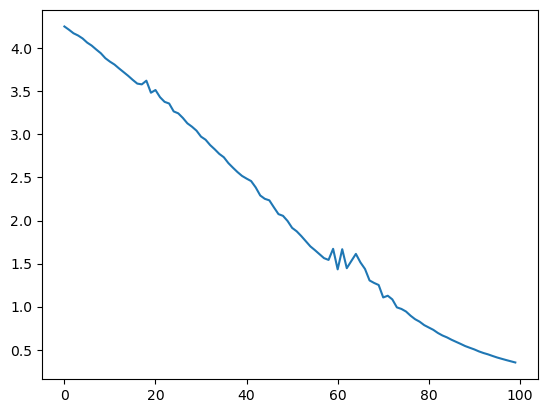

In [65]:
losses = []
for n in range(100):
  print('.', end='')
  logs = translator.train_step([example_input_batch, example_target_batch])
  losses.append(logs['batch_loss'].numpy())

print()
plt.plot(losses)

In [66]:
# building a fresh copy of the model to train from scratch since the training step is working
train_translator = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor)

# Configure the loss and optimizer
train_translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

Training the model

In [67]:
class BatchLogs(tf.keras.callbacks.Callback):
  def __init__(self, key):
    self.key = key
    self.logs = []

  def on_train_batch_end(self, n, logs):
    self.logs.append(logs[self.key])

batch_loss = BatchLogs('batch_loss')

In [68]:
train_translator.fit(dataset, epochs=100,
                     callbacks=[batch_loss])

Epoch 1/100
189/189 [==============================] - 112s 551ms/step - batch_loss: 5.1341
Epoch 2/100
189/189 [==============================] - 96s 509ms/step - batch_loss: 4.3537
Epoch 3/100
189/189 [==============================] - 95s 503ms/step - batch_loss: 3.7402
Epoch 4/100
189/189 [==============================] - 94s 499ms/step - batch_loss: 3.0882
Epoch 5/100
189/189 [==============================] - 93s 491ms/step - batch_loss: 2.4673
Epoch 6/100
189/189 [==============================] - 91s 482ms/step - batch_loss: 1.9484
Epoch 7/100
189/189 [==============================] - 91s 480ms/step - batch_loss: 1.5328
Epoch 8/100
189/189 [==============================] - 91s 481ms/step - batch_loss: 1.1937
Epoch 9/100
189/189 [==============================] - 91s 480ms/step - batch_loss: 0.9055
Epoch 10/100
189/189 [==============================] - 89s 474ms/step - batch_loss: 0.6606
Epoch 11/100
189/189 [==============================] - 90s 478ms/step - batch_loss: 0.4

Text(0, 0.5, 'CE/token')

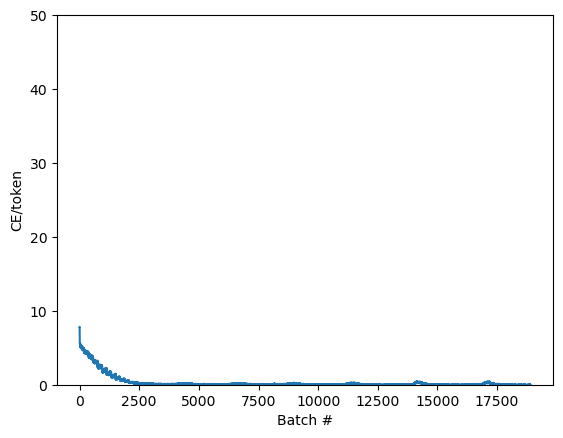

In [69]:
plt.plot(batch_loss.logs)
plt.ylim([0, 50])
plt.xlabel('Batch #')
plt.ylabel('CE/token')

Translation

In [70]:
class Translator(tf.Module):

  def __init__(self, encoder, decoder, input_text_processor,
               output_text_processor):
    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor

    self.output_token_string_from_index = (
        tf.keras.layers.StringLookup(
            vocabulary=output_text_processor.get_vocabulary(),
            mask_token='',
            invert=True))

    # The output should never generate padding, unknown, or start.
    index_from_string = tf.keras.layers.StringLookup(
        vocabulary=output_text_processor.get_vocabulary(), mask_token='')
    token_mask_ids = index_from_string(['', '[UNK]', '[START]']).numpy()

    token_mask = np.zeros([index_from_string.vocabulary_size()], dtype=np.bool)
    token_mask[np.array(token_mask_ids)] = True
    self.token_mask = token_mask

    self.start_token = index_from_string(tf.constant('[START]'))
    self.end_token = index_from_string(tf.constant('[END]'))

In [71]:
translator = Translator(
    encoder=train_translator.encoder,
    decoder=train_translator.decoder,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [72]:
# converting token IDs to human readable text
def tokens_to_text(self, result_tokens):
  shape_checker = ShapeChecker()
  shape_checker(result_tokens, ('batch', 't'))
  result_text_tokens = self.output_token_string_from_index(result_tokens)
  shape_checker(result_text_tokens, ('batch', 't'))

  result_text = tf.strings.reduce_join(result_text_tokens,
                                       axis=1, separator=' ')
  shape_checker(result_text, ('batch'))

  result_text = tf.strings.strip(result_text)
  shape_checker(result_text, ('batch',))
  return result_text

In [73]:
Translator.tokens_to_text = tokens_to_text

In [74]:
# inputting random token IDs to see what it generates
example_output_tokens = tf.random.uniform(
    shape=[5, 2], minval=0, dtype=tf.int64,
    maxval=output_text_processor.vocabulary_size())
translator.tokens_to_text(example_output_tokens).numpy()

array([b'shoes changing', b'greetings mishra', b'lord frame',
       b'cheated hike', b'wahab latest'], dtype=object)

In [75]:
# takes the decoder's logit outputs and samples token IDs from that distribution
def sample(self, logits, temperature):
  shape_checker = ShapeChecker()
  # 't' is usually 1 here.
  shape_checker(logits, ('batch', 't', 'vocab'))
  shape_checker(self.token_mask, ('vocab',))

  token_mask = self.token_mask[tf.newaxis, tf.newaxis, :]
  shape_checker(token_mask, ('batch', 't', 'vocab'), broadcast=True)

  # Set the logits for all masked tokens to -inf, so they are never chosen.
  logits = tf.where(self.token_mask, -np.inf, logits)

  if temperature == 0.0:
    new_tokens = tf.argmax(logits, axis=-1)
  else: 
    logits = tf.squeeze(logits, axis=1)
    new_tokens = tf.random.categorical(logits/temperature,
                                        num_samples=1)
  
  shape_checker(new_tokens, ('batch', 't'))

  return new_tokens

In [76]:
Translator.sample = sample

In [77]:
# testing the function on random i/p
example_logits = tf.random.normal([5, 1, output_text_processor.vocabulary_size()])
example_output_tokens = translator.sample(example_logits, temperature=1.0)
example_output_tokens

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[4445],
       [1870],
       [3276],
       [4748],
       [4185]])>

In [78]:
# implementing text to text translation loop
def translate_unrolled(self,
                       input_text, *,
                       max_length=50,
                       return_attention=True,
                       temperature=1.0):
  batch_size = tf.shape(input_text)[0]
  input_tokens = self.input_text_processor(input_text)
  enc_output, enc_state = self.encoder(input_tokens)

  dec_state = enc_state
  new_tokens = tf.fill([batch_size, 1], self.start_token)

  result_tokens = []
  attention = []
  done = tf.zeros([batch_size, 1], dtype=tf.bool)

  for _ in range(max_length):
    dec_input = DecoderInput(new_tokens=new_tokens,
                             enc_output=enc_output,
                             mask=(input_tokens!=0))
    
    dec_result, dec_state = self.decoder(dec_input, state=dec_state)

    attention.append(dec_result.attention_weights)

    new_tokens = self.sample(dec_result.logits, temperature)

    # If a sequence produces an `end_token`, set it `done`
    done = done | (new_tokens == self.end_token)
    # Once a sequence is done it only produces 0-padding.
    new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

    # Collect the generated tokens
    result_tokens.append(new_tokens)

    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Convert the list of generates token ids to a list of strings.
  result_tokens = tf.concat(result_tokens, axis=-1)
  result_text = self.tokens_to_text(result_tokens)

  if return_attention:
    attention_stack = tf.concat(attention, axis=1)
    return {'text': result_text, 'attention': attention_stack}
  else:
    return {'text': result_text}


In [79]:
Translator.translate = translate_unrolled

In [102]:
change_vocab('tum kaise ho')

'tum kaise hoo '

In [126]:
# TESTING
input_text = tf.constant([
    change_vocab('sabko aaj kaha jana hai'),
    change_vocab('kya kaam karte hai tumhare papa '),
    change_vocab('tumhara papa ka naam kya hai'),
    change_vocab('maine khana kha liya hai')
])

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print(result['text'][2].numpy().decode())
print(result['text'][3].numpy().decode())
print()

why have to go to everyone today
what do you do invite your papa . . . .
what is your father in your name ?
i have eaten eaten ate . .



In [121]:
@tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
def tf_translate(self, input_text):
  return self.translate(input_text)

Translator.tf_translate = tf_translate

In [82]:
%%time
result = translator.tf_translate(
    input_text = input_text)

CPU times: user 20.2 s, sys: 244 ms, total: 20.5 s
Wall time: 20.4 s


In [83]:
%%time
result = translator.tf_translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

the boss went to say a nap . . . understand more humanitarian works
this is the same

CPU times: user 142 ms, sys: 18.6 ms, total: 161 ms
Wall time: 121 ms


In [84]:
#@title [Optional] Use a symbolic loop
def translate_symbolic(self,
                       input_text,
                       *,
                       max_length=50,
                       return_attention=True,
                       temperature=1.0):
  shape_checker = ShapeChecker()
  shape_checker(input_text, ('batch',))

  batch_size = tf.shape(input_text)[0]

  # Encode the input
  input_tokens = self.input_text_processor(input_text)
  shape_checker(input_tokens, ('batch', 's'))

  enc_output, enc_state = self.encoder(input_tokens)
  shape_checker(enc_output, ('batch', 's', 'enc_units'))
  shape_checker(enc_state, ('batch', 'enc_units'))

  # Initialize the decoder
  dec_state = enc_state
  new_tokens = tf.fill([batch_size, 1], self.start_token)
  shape_checker(new_tokens, ('batch', 't1'))

  # Initialize the accumulators
  result_tokens = tf.TensorArray(tf.int64, size=1, dynamic_size=True)
  attention = tf.TensorArray(tf.float32, size=1, dynamic_size=True)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  shape_checker(done, ('batch', 't1'))

  for t in tf.range(max_length):
    dec_input = DecoderInput(
        new_tokens=new_tokens, enc_output=enc_output, mask=(input_tokens != 0))

    dec_result, dec_state = self.decoder(dec_input, state=dec_state)

    shape_checker(dec_result.attention_weights, ('batch', 't1', 's'))
    attention = attention.write(t, dec_result.attention_weights)

    new_tokens = self.sample(dec_result.logits, temperature)
    shape_checker(dec_result.logits, ('batch', 't1', 'vocab'))
    shape_checker(new_tokens, ('batch', 't1'))

    # If a sequence produces an `end_token`, set it `done`
    done = done | (new_tokens == self.end_token)
    # Once a sequence is done it only produces 0-padding.
    new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

    # Collect the generated tokens
    result_tokens = result_tokens.write(t, new_tokens)

    if tf.reduce_all(done):
      break

  # Convert the list of generated token ids to a list of strings.
  result_tokens = result_tokens.stack()
  shape_checker(result_tokens, ('t', 'batch', 't0'))
  result_tokens = tf.squeeze(result_tokens, -1)
  result_tokens = tf.transpose(result_tokens, [1, 0])
  shape_checker(result_tokens, ('batch', 't'))

  result_text = self.tokens_to_text(result_tokens)
  shape_checker(result_text, ('batch',))

  if return_attention:
    attention_stack = attention.stack()
    shape_checker(attention_stack, ('t', 'batch', 't1', 's'))

    attention_stack = tf.squeeze(attention_stack, 2)
    shape_checker(attention_stack, ('t', 'batch', 's'))

    attention_stack = tf.transpose(attention_stack, [1, 0, 2])
    shape_checker(attention_stack, ('batch', 't', 's'))

    return {'text': result_text, 'attention': attention_stack}
  else:
    return {'text': result_text}

In [85]:
Translator.translate = translate_symbolic

The initial implementation used python lists to collect the outputs. This uses `tf.range` as the loop iterator, allowing `tf.autograph` to convert the loop. The biggest change in this implementation is the use of `tf.TensorArray` instead of python `list` to accumulate tensors. `tf.TensorArray` is required to collect a variable number of tensors in graph mode. 

With eager execution this implementation performs on par with the original:

In [86]:
# RUN THIS
result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

the boss went to makes tea . . the wicket of rot .
same poem



But when you wrap it in a `tf.function` you'll notice two differences.

In [87]:
@tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
def tf_translate(self, input_text):
  return self.translate(input_text)

Translator.tf_translate = tf_translate

First: Graph creation is much faster (~10x), since it doesn't create `max_iterations` copies of the model.

In [88]:
%%time
result = translator.tf_translate(
    input_text = input_text)

CPU times: user 1.42 s, sys: 20 ms, total: 1.44 s
Wall time: 1.43 s


Second: The compiled function is much faster on small inputs (5x on this example), because it can break out of the loop.

In [89]:
%%time
result = translator.tf_translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

the day is . . the sow is called by blowing me a nap . . .
same thing is called

CPU times: user 86.5 ms, sys: 15.4 ms, total: 102 ms
Wall time: 68.7 ms


### Visualize the process

The attention weights returned by the `translate` method show where the model was "looking" when it generated each output token.

So the sum of the attention over the input should return all ones:

In [90]:
a = result['attention'][0]

print(np.sum(a, axis=-1))

[1.         1.         1.0000001  1.         0.99999994 1.
 0.99999994 1.         1.         1.         1.         1.
 0.9999999  1.         1.         0.99999994 1.         1.        ]


Here is the attention distribution for the first output step of the first example. Note how the attention is now much more focused than it was for the untrained model:

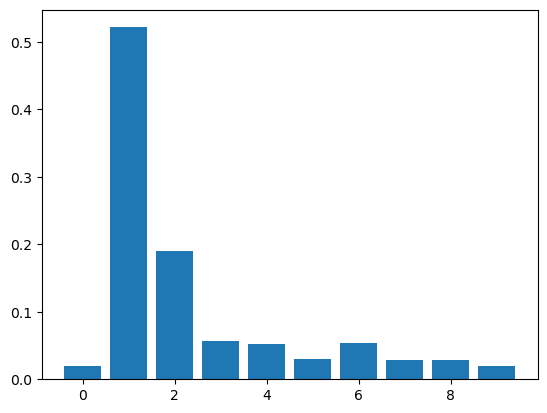

In [91]:
_ = plt.bar(range(len(a[0, :])), a[0, :])

Since there is some rough alignment between the input and output words, you expect the attention to be focused near the diagonal:

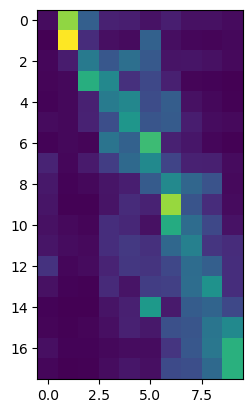

In [92]:
plt.imshow(np.array(a), vmin=0.0)

Here is some code to make a better attention plot:

In [93]:
#@title Labeled attention plots
def plot_attention(attention, sentence, predicted_sentence):
  sentence = tf_lower_and_split_punct(sentence).numpy().decode().split()
  predicted_sentence = predicted_sentence.numpy().decode().split() + ['[END]']
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  attention = attention[:len(predicted_sentence), :len(sentence)]

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')
  plt.suptitle('Attention weights')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


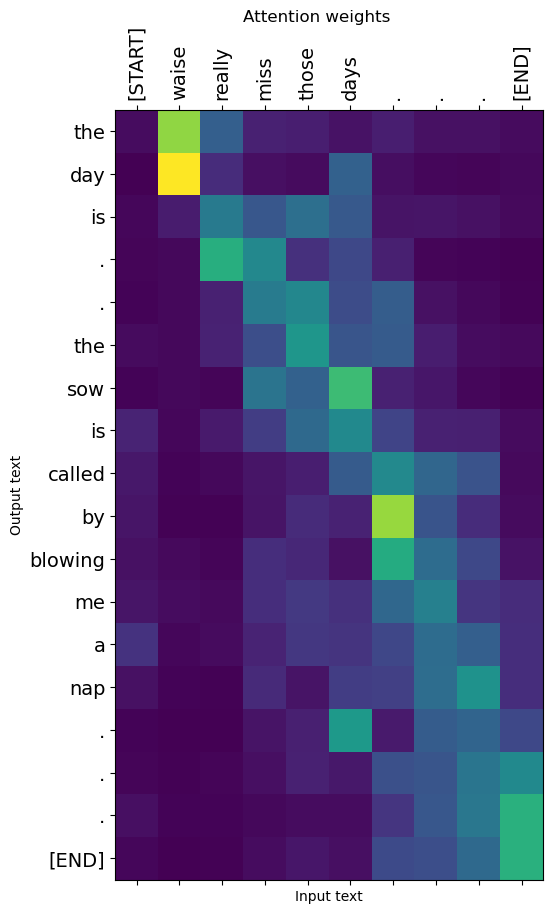

In [94]:
i=0
plot_attention(result['attention'][i], input_text[i], result['text'][i])

In [95]:
doublemetaphone('sabse')[0]+'*'+doublemetaphone('sabse'[::-1])[0]+'*'+'sabse'[:2]+'*'+'sabse'[len(j)-1:]+' '+doublemetaphone('best')[0]+'*'+doublemetaphone('best'[::-1])[0]+'*'+'best'[:2]+'*'+'best'[len(j)-1:]+' '+doublemetaphone('friend')[0]+'*'+doublemetaphone('friend'[::-1])[0]+'*'+'friend'[:2]+'*'+'friend'[len(j)-1:]

'SPS*ASPS*sa*e PST*TSP*be* FRNT*TNRF*fr*nd'

In [96]:
%%time
three_input_text = tf.constant([#'sabse best friend', 
                                #'That toh I know',
                                #'She was bhunnoing the masalas jub phone ki ghuntee bugee',
                                #'tum batao',
                                #'kya karna hai',
                                'SPS*ASPS*sa*e PST*TSP*be* FRNT*TNRF*fr*nd'
])

result = translator.tf_translate(three_input_text)
print(result['text'])
for tr in result['text']:
  print(tr.numpy().decode())

print()

tf.Tensor([b'. . . . . kapil disturb . . .'], shape=(1,), dtype=string)
. . . . . kapil disturb . . .

CPU times: user 56.6 ms, sys: 2.46 ms, total: 59.1 ms
Wall time: 40.4 ms


In [97]:
result['text']

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'. . . . . kapil disturb . . .'], dtype=object)>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


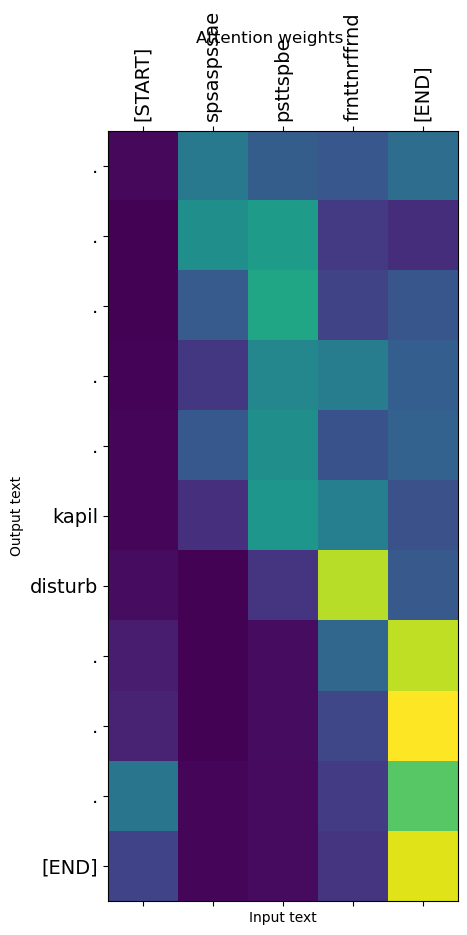

In [98]:
i = 0
plot_attention(result['attention'][i], three_input_text[i], result['text'][i])

In [99]:
i = 1
plot_attention(result['attention'][i], three_input_text[i], result['text'][i])

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [ ]:
i = 2
plot_attention(result['attention'][i], three_input_text[i], result['text'][i])

In [ ]:
long_input_text = tf.constant([inp[-1]])

import textwrap
print('Expected output:\n', '\n'.join(textwrap.wrap(targ[-1])))

In [ ]:
result = translator.tf_translate(long_input_text)

i = 0
plot_attention(result['attention'][i], long_input_text[i], result['text'][i])
_ = plt.suptitle('Graph')

In [127]:
tf.saved_model.save(translator, 'translator',
                    signatures={'serving_default': translator.tf_translate})

In [128]:
reloaded = tf.saved_model.load('translator')
result = reloaded.tf_translate(three_input_text)

In [129]:
%%time
result = reloaded.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

hahaha . . . . . kapil elect . . .

CPU times: user 57.5 ms, sys: 6.87 ms, total: 64.4 ms
Wall time: 41.1 ms


In [ ]:
#!zip -r translator.zip translator